In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob

In [2]:
np.random.seed(0)

LPs = np.arange(1,101)
runs = np.arange(1,101)

mesh1, mesh2 = np.meshgrid(LPs, runs)

flat_mesh1 = mesh1.flatten()
flat_mesh2 = mesh2.flatten()

#paths = ['/share/gpu0/jjwhit/kappaTNG_suites/LP086/run027/kappa*.dat']
paths = ['/share/gpu0/jjwhit/kappaTNG_suites/LP{:03d}/run{:03d}/'.format(lp, run) for lp, run in zip(flat_mesh1, flat_mesh2)]

#Shuffle files
np.random.shuffle(paths)
total_nb_files = len(paths)

In [7]:
sorted_files = [file for path in paths for file in glob.glob(path)]

print(len(sorted_files))
#Appears files naturally load in order.

10000


In [5]:
# file_prefix = "kappa"
# file_extension = ".dat"

# def get_file_number(file_name):
#     return int(file_name[len(file_prefix):-len(file_extension)])
    
# all_files = []
# for path in paths:
#     required_files = [file for file in path if file.startswith(file_prefix) and file.endswith(file_extension)]
# #The files are now ordered in ascending redshift.
#     sorted_files = sorted(required_files, key=get_file_number)

In [6]:
print(len(sorted_files))

0


In [9]:
#Load the COSMOS shape catalog information 
redshift_distribution = np.load("/home/jjwhit/rcGAN/mass_map_utils/cosmos/hist_n_z.npy", allow_pickle=True)

# It appears data is already normalised.

In [11]:
redshift_vals_array = np.array((0, 
                 0.034, 0.070, 0.105, 0.142, 0.179,
                 0.216, 0.255, 0.294, 0.335, 0.376,
                 0.418, 0.462, 0.506, 0.552, 0.599,
                 0.648, 0.698, 0.749, 0.803, 0.858,
                 0.914, 0.973, 1.034, 1.097, 1.163,
                 1.231, 1.302, 1.375, 1.452, 1.532,
                 1.615, 1.703, 1.794, 1.889, 1.989,
                 2.094, 2.203, 2.319, 2.440, 2.568,
                 2.605, 2.642, 2.679,
                 2.716, 2.755, 2.794, 2.835, 2.876,
                 2.918, 2.962, 3.006, 3.052, 3.099,
                 3.148, 3.198, 3.249, 3.303, 3.358,
                 3.414, 3.473, 3.534, 3.597, 3.663,
                 3.731, 3.802, 3.875, 3.952, 4.032,
                 4.115, 4.203, 4.294, 4.389, 4.489,
                 4.594, 4.703, 4.819, 4.940, 5.068))

#TODO: Is this an acceptable way to extend the redshift values (prev + 2.5).

In [12]:
len(redshift_vals_array)

79

In [13]:
# # area_under_normalized_curve = np.trapz(redshift_distribution, z)
# print(f"Area under the normalized curve: {area_under_normalized_curve}")

# # normalised_data = redshift_distribution / area_under_normalized_curve
# print(np.trapz(normalised_data, z))


NameError: name 'area_under_normalized_curve' is not defined

In [14]:
z = np.arange(0, 5.5, .01)


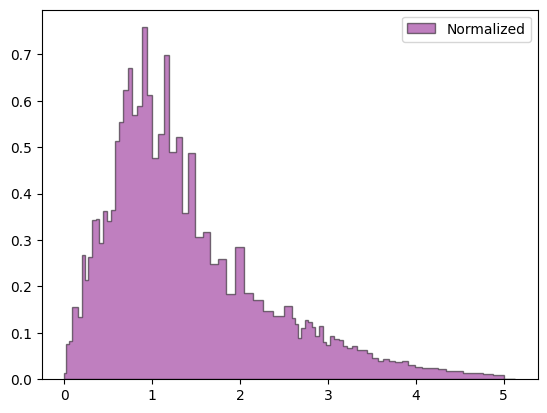

In [15]:
bin_edges = (np.concatenate([[0],
            [(redshift_vals_array[i] - redshift_vals_array[i-1])/2 + 
            redshift_vals_array[i-1] for i in range(1, len(redshift_vals_array))],
            [redshift_vals_array[-1] + (redshift_vals_array[-1] - redshift_vals_array[-2])/2]]))
# Create a histogram using your specified bin edges
hist, bin_edges, _ = (plt.hist(z, weights=redshift_distribution, bins=bin_edges, color="purple", 
                        alpha=0.5, ec="k", histtype='stepfilled', density=True, label='Normalized'))
plt.legend()
plt.show()
#bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
## Print the bin edges and central values
# for i, (edge, center, value) in enumerate(zip(bin_edges, bin_centers, hist)):
#     print(f"Bin {i + 1}: Edge: {edge}, Center: {center}, Value: {value}")
pdf = hist

In [24]:
source_dir = "/share/gpu0/jjwhit/kappaTNG_suites/LP006/run052/" 

#source_dir = "/share/gpu0/jjwhit/kappaTNG_suites/LP*/run*/" # TODO: Switch to this after debugging.

file_prefix = "kappa"
file_extension = ".dat"

# List all files in the folder
files = os.listdir(source_dir)

required_files = [file for file in files if file.startswith(file_prefix) and file.endswith(file_extension)]

def get_file_number(file_name):
    return int(file_name[len(file_prefix):-len(file_extension)])

#The files are now ordered in ascending redshift 0->40.
sorted_files = sorted(required_files, key=get_file_number)

In [25]:
img_num = 0
kappa_tot = np.zeros((1024, 1024))
omega = np.zeros(len(redshift_vals_array))

#for fname in sorted_files:
for fname in range(len(redshift_vals_array)): #We will repeat this process for every source redshift.
    if fname in range(0, 41):
        full_path = os.path.join(source_dir, sorted_files[fname])
    else:
        # Uses z=2.6 map (with appropriate weight) for redshifts beyond kappaTNG range.
        full_path = os.path.join(source_dir, sorted_files[40])

    if not os.path.exists(full_path):
        print(f'The file at {full_path} does not exist.')
    else:
        with open(full_path, 'rb') as f:
            # Load file
            #print(f"loading z = {redshift_vals_array[fname]}...")
            dummy = np.fromfile(f, dtype="int32", count=1)
            kappa = np.fromfile(f, dtype="float", count=1024*1024)
            dummy = np.fromfile(f, dtype="int32", count=1)  

            kappa = kappa.reshape((1024, 1024))

            # Bin size halved for first and last bins.
            # delta_z is the range of each bin.
            if img_num == 0:
                delta_z = (redshift_vals_array[img_num + 1] - redshift_vals_array[img_num])/2
              
        
            elif img_num == len(redshift_vals_array) - 1:
                delta_z = (redshift_vals_array[img_num] - redshift_vals_array[img_num - 1])/2

            else:
                delta_z = (
                    (redshift_vals_array[img_num + 1] - redshift_vals_array[img_num]) /2
                    - (redshift_vals_array[img_num] - redshift_vals_array[img_num - 1]) /2
                )
            
            omega[img_num] = pdf[img_num] * delta_z
            norm_factor = np.sum(omega)
            
            # kappa_tot += omega[img_num] * kappa
            kappa_tot += (omega[img_num]/norm_factor) * kappa
            img_num +=1

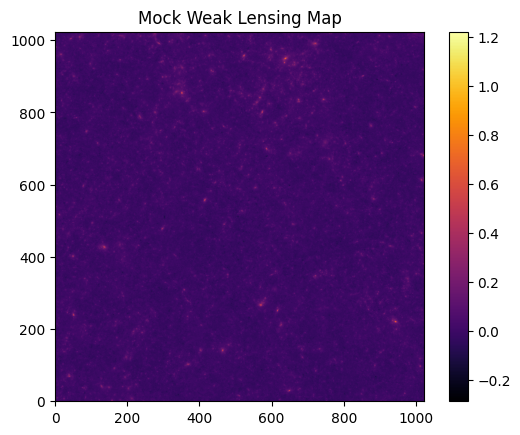

In [26]:
plt.imshow(kappa_tot, cmap = "inferno", origin="lower")
plt.colorbar()
plt.title("Mock Weak Lensing Map")
plt.show()

In [ ]:
#TODO: Import these rather than rewriting functions.

def compute_fourier_kernel(N: int) -> np.ndarray:
  """Computes the Fourier space kernel which represents the mapping between 
    convergence (kappa) and shear (gamma).
  Args:
    N (int): x,y dimension of image patch (assumes square images).
  Returns:
    𝒟 (np.ndarray): Fourier space Kaiser-Squires kernel, with shape = [N,N].
  """
  # Generate grid of Fourier domain
  kx = np.arange(N).astype(np.float64) - N/2
  ky, kx = np.meshgrid(kx, kx)
  k = kx**2+ky**2
  # Define Kaiser-Squires kernel
  𝒟 = np.zeros((N, N), dtype=np.complex128)
  𝒟 = np.where(k > 0, ((kx ** 2.0 - ky ** 2.0) + 1j * (2.0 * kx * ky))/k, 𝒟)
  # Apply inverse FFT shift 
  return np.fft.ifftshift(𝒟)


def forward_model(𝜅: np.ndarray, 𝒟: np.ndarray) -> np.ndarray:
  """Applies the forward mapping between convergence and shear through their 
    relationship in Fourier space.
  Args:
    𝜅 (np.ndarray): Convergence field, with shape [N,N].
    𝒟 (np.ndarray): Fourier space Kaiser-Squires kernel, with shape = [N,N].
  Returns:
    γ (np.ndarray): Shearing field, with shape [N,N].
  """
  𝓕𝜅 = np.fft.fft2(𝜅) # Perform 2D forward FFT
  𝓕γ = 𝓕𝜅 * 𝒟 # Map convergence onto shear
  return np.fft.ifft2(𝓕γ) # Perform 2D inverse FFT

def box_muller_transform(g, u):
    """Performs the Polar form of the Box-Muller transform.
    Args:
      g (np.ndarray): Random Gaussian noise.
      u (np.ndarray): Random Uniform noise.

    Returns:
      a (np.ndarray): Real component of point drawn from distribution.
      b (np.ndarray): Imaginary component of point drawn from distribution.
    """
    r = np.sqrt(-2*np.log(g))
    theta = 2*np.pi*u
    a = r*np.cos(theta)
    b = r*np.sin(theta)
    return a,b 


#TODO: Add new noise methods
def noise_maker(theta, ngrid, ngal, kappa, u, g):
    """Adds some random Gaussian noise to a mock weak lensing map.
    Args:
        theta (float): Opening angle in deg.
        ngrid (int): Number of grids.
        ngal (int): Number of galaxies.
        kappa (np.ndarray): Convergence map.
        u (np.ndarray): Random uniform noise.
        g (np.ndarray): Random uniform noise.
    
    Returns:
        gamma (np.ndarray): A synthetic representation of the shear field, gamma, with added noise.
    """
    D = compute_fourier_kernel(ngrid) #Fourier kernel
    #sigma = 0.37/np.sqrt(((theta*60/ngrid)**2)*ngal)

    gamma = forward_model(kappa, D) 
    # (a,b) = box_muller_transform(u, g)
    # gamma.real += a
    # gamma.imag += b
    std1 = np.load('/home/jjwhit/RCGAN/mass_map_utils/cosmos/cosmos_std1.npy')
    std2 = np.load('/home/jjwhit/RCGAN/mass_map_utils/cosmos/cosmos_std2.npy')

    n1 = np.random.randn(1024,1024) * std1
    n2 = np.random.randn(1024, 1024) * std2

    gamma.real += n1
    gamma.imag += n2
    return gamma

NameError: name 'np' is not defined

In [ ]:
uni_dist = np.random.uniform(0, 1, (1024, 1024))
g_dist = np.random.uniform(0, 1, (1024, 1024))

In [ ]:
gamma = noise_maker(5.0, 1024, 30, kappa_tot, uni_dist, gaus_dist)
# plt.imshow(gamma.real)
# plt.title('Real Component of shear field')
# plt.colorbar()
# plt.show()
# plt.imshow(gamma.imag)
# plt.title('Imaginary Component of shear field')
# plt.colorbar()
# plt.show()

/var/folders/6b/03s1_j_j7hxcy34z8hkmlj140000gp/T/ipykernel_23481/892740841.py:17: RuntimeWarning: invalid value encountered in divide
  𝒟 = np.where(k > 0, ((kx ** 2.0 - ky ** 2.0) + 1j * (2.0 * kx * ky))/k, 𝒟)


In [ ]:
(c, d) = box_muller_transform(uni, gaus)

In [ ]:
def backward_model(γ: np.ndarray, 𝒟: np.ndarray) -> np.ndarray:
  """Applies the backward mapping between shear and convergence through their 
    relationship in Fourier space.
  Args:
    γ (jnp.ndarray): Shearing field, with shape [N,N].
    𝒟 (jnp.ndarray): Fourier space Kaiser-Squires kernel, with shape = [N,N].
  Returns:
    𝜅 (jnp.ndarray): Convergence field, with shape [N,N].
  """
  𝓕γ = np.fft.fft2(γ) # Perform 2D forward FFT
  𝓕𝜅 = 𝓕γ / 𝒟 # Map convergence onto shear
  𝓕𝜅 = np.nan_to_num(𝓕𝜅, nan=0, posinf=0, neginf=0) # Remove singularities
  return np.fft.ifft2(𝓕𝜅) # Perform 2D inverse FFT

/var/folders/6b/03s1_j_j7hxcy34z8hkmlj140000gp/T/ipykernel_23481/892740841.py:17: RuntimeWarning: invalid value encountered in divide
  𝒟 = np.where(k > 0, ((kx ** 2.0 - ky ** 2.0) + 1j * (2.0 * kx * ky))/k, 𝒟)
/var/folders/6b/03s1_j_j7hxcy34z8hkmlj140000gp/T/ipykernel_23481/2275909979.py:11: RuntimeWarning: divide by zero encountered in divide
  𝓕𝜅 = 𝓕γ / 𝒟 # Map convergence onto shear


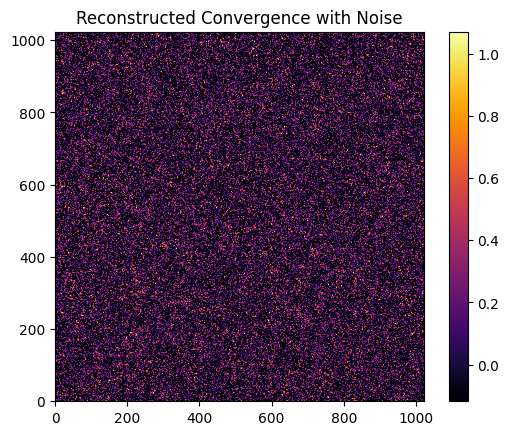

In [ ]:
D = compute_fourier_kernel(1024)
kappa_sim = backward_model(gamma,D)

mx,mn = np.max(kappa),np.min(kappa)
plt.imshow(np.real(kappa_sim), cmap="inferno", vmax=mx, vmin=mn, origin="lower")
plt.colorbar()
plt.title("Reconstructed Convergence with Noise")
plt.show() 

## Masking

Mask is made in kappatng_Cosmos notebook.

In [9]:
#source_dir = "/share/gpu0/jjwhit/kappaTNG_suites/LP*/run*/"
#all_dirs = glob.glob(source_dir)
dst_dir = "/share/gpu0/jjwhit/kappa_cosmos_simulations/"

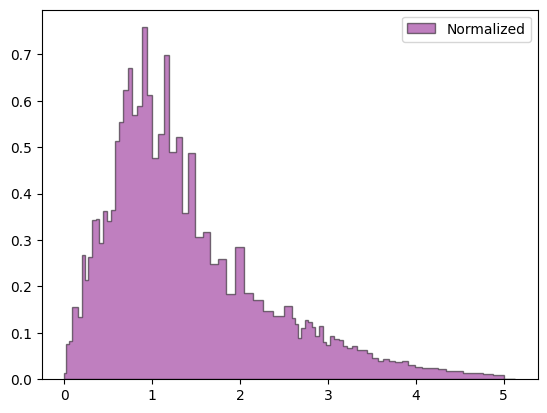

In [8]:
redshift_distribution = np.load("/home/jjwhit/rcGAN/mass_map_utils/cosmos/hist_n_z.npy", allow_pickle=True)

redshift_vals_array = np.array((0, 
                                0.034, 0.070, 0.105, 0.142, 0.179,
                                0.216, 0.255, 0.294, 0.335, 0.376,
                                0.418, 0.462, 0.506, 0.552, 0.599,
                                0.648, 0.698, 0.749, 0.803, 0.858,
                                0.914, 0.973, 1.034, 1.097, 1.163,
                                1.231, 1.302, 1.375, 1.452, 1.532,
                                1.615, 1.703, 1.794, 1.889, 1.989,
                                2.094, 2.203, 2.319, 2.440, 2.568,
                                2.605, 2.642, 2.679,
                                2.716, 2.755, 2.794, 2.835, 2.876,
                                2.918, 2.962, 3.006, 3.052, 3.099,
                                3.148, 3.198, 3.249, 3.303, 3.358,
                                3.414, 3.473, 3.534, 3.597, 3.663,
                                3.731, 3.802, 3.875, 3.952, 4.032,
                                4.115, 4.203, 4.294, 4.389, 4.489,
                                4.594, 4.703, 4.819, 4.940, 5.068)
                                )

z = np.arange(0, 5.5, .01)

bin_edges = (np.concatenate([[0],
            [(redshift_vals_array[i] - redshift_vals_array[i-1])/2 + 
            redshift_vals_array[i-1] for i in range(1, len(redshift_vals_array))],
            [redshift_vals_array[-1] + (redshift_vals_array[-1] - redshift_vals_array[-2])/2]]))
# Create a histogram using your specified bin edges
hist, bin_edges, _ = (plt.hist(z, weights=redshift_distribution, bins=bin_edges, color="purple", 
                        alpha=0.5, ec="k", histtype='stepfilled', density=True, label='Normalized'))
plt.legend()
pdf = hist


In [9]:
np.random.seed(0)
LPs = np.arange(1, 101)
runs = np.arange(1, 101)
mesh1, mesh2 = np.meshgrid(LPs, runs)
flat_mesh1 = mesh1.flatten()
flat_mesh2 = mesh2.flatten()
np.random.shuffle(flat_mesh1)
np.random.shuffle(flat_mesh2)

In [12]:
print(len(flat_mesh1))

10000


In [6]:
dst_dir = "/share/gpu0/jjwhit/kappa_cosmos_simulations/"
if not os.path.exists(dst_dir):
   # Create a new directory because it does not exist
   os.makedirs(dst_dir)
   print("The new directory has been made!")

dst_train_path = dst_dir + 'kappa_train/'
dst_test_path = dst_dir + 'kappa_test/'
dst_val_path = dst_dir + 'kappa_val/'

if not os.path.exists(dst_train_path):
    os.makedirs(dst_train_path)
if not os.path.exists(dst_test_path):
    os.makedirs(dst_test_path)
if not os.path.exists(dst_val_path):
    os.makedirs(dst_val_path)

In [27]:
n = 1
for it in range(100):
#for it in range(len(flat_mesh1)):
    path_to_load = '/share/gpu0/jjwhit/kappaTNG_suites/LP{:03d}/run{:03d}/'.format(flat_mesh1[it], flat_mesh2[it])
    
    # Reset slice, kappa_tot, and omega for each different map.
    slice = 0
    kappa_tot = np.zeros((1024, 1024))
    omega = np.zeros(len(redshift_vals_array))
    for fname in range(len(redshift_vals_array)):
        if fname in range(0, 41):
            full_path = os.path.join(path_to_load, 'kappa' + str(fname).zfill(2) + '.dat')
        else:
            # Uses z=2.6 map (with appropriate weight) for redshifts beyond kappaTNG range.
            full_path = os.path.join(path_to_load, 'kappa40.dat')

        if not os.path.exists(full_path):
            print(f'The file at {full_path} does not exist.')
        else:
            with open(full_path, 'rb') as f:
                # Load file
                #print(f"loading z = {redshift_vals_array[fname]}...")
                dummy = np.fromfile(f, dtype="int32", count=1)
                kappa = np.fromfile(f, dtype="float", count=1024*1024)
                dummy = np.fromfile(f, dtype="int32", count=1)  
    
                kappa = kappa.reshape((1024, 1024))
            # Bin size halved for first and last bins.
            # delta_z is the range of each bin.
            if slice == 0:
                delta_z = (redshift_vals_array[slice + 1] - redshift_vals_array[slice])/2     

            elif slice == len(redshift_vals_array) - 1:
                delta_z = (redshift_vals_array[slice] - redshift_vals_array[slice - 1])/2

            else:
                delta_z = (
                    (redshift_vals_array[slice + 1] - redshift_vals_array[slice]) /2
                    - (redshift_vals_array[slice] - redshift_vals_array[slice - 1]) /2
                )

            omega[slice] = pdf[slice] * delta_z
            norm_factor = np.sum(omega)
            kappa_tot += (omega[slice]/norm_factor) * kappa
            slice +=1

    if (it/len(flat_mesh1)) <= 0.85:
        dst_dir = dst_train_path
    elif (it/len(flat_mesh1)) > 0.85 and (it/len(flat_mesh1)) <=0.95:
        dst_dir = dst_test_path
    else:
        dst_dir = dst_val_path

    save_path = '{:s}{:s}{:05d}{:s}'.format(dst_dir, "sim_", n, ".npy")
    np.save(save_path, kappa_tot, allow_pickle=True)
    n +=1

In [17]:
print(str(2).zfill(2))

02


In [32]:
testing = np.load('/share/gpu0/jjwhit/kappa_cosmos_simulations/kappa_train/sim_00008.npy')

In [22]:
import matplotlib.pyplot as plt

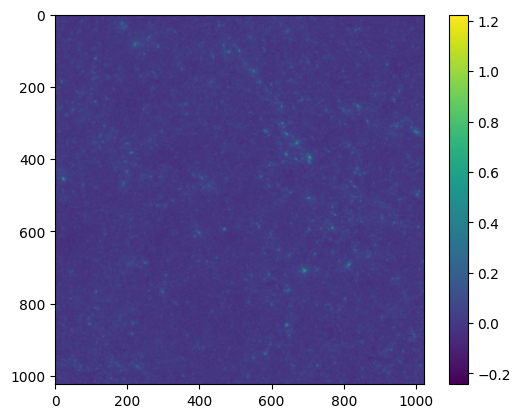

In [33]:
plt.imshow(testing)
plt.colorbar()

In [ ]:
map1 = np.load("/share/gpu0/jjwhit/kappaTNG_suites/LP006/run052/kappa03",  allow_pickle=True)